1) В среде Google Colab создать новый блокнот (notebook). Импортировать
необходимые для работы библиотеки и модули.

In [51]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')
current_directory = os.getcwd()
print("Текущая директория:", current_directory)

Текущая директория: /content/drive/MyDrive/Colab Notebooks


In [52]:
# импорт модулей
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import sklearn

2) Загрузить набор данных MNIST, содержащий размеченные изображения
рукописных цифр.

In [53]:
# загрузка датасета
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

3) Разбить набор данных на обучающие и тестовые данные в соотношении
60 000:10 000 элементов. При разбиении параметр random_state выбрать
равным (4k – 1), где k - номер бригады, k = 6 => random_state = 23

In [54]:
# создание своего разбиения датасета
from sklearn.model_selection import train_test_split

# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# разбиваем по вариантам
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 10000,
                                                    train_size = 60000,
                                                    random_state = 23)
# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)
Shape of X test: (10000, 28, 28)
Shape of y test: (10000,)


4) Вывести первые 4 элемента обучающих данных (изображения и метки
цифр).

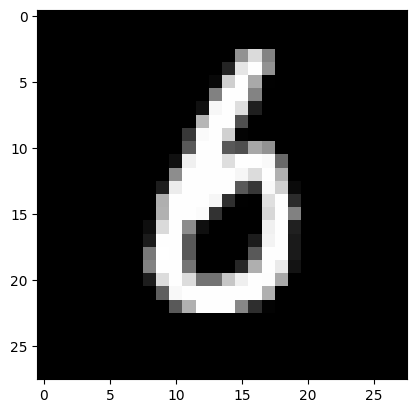

6


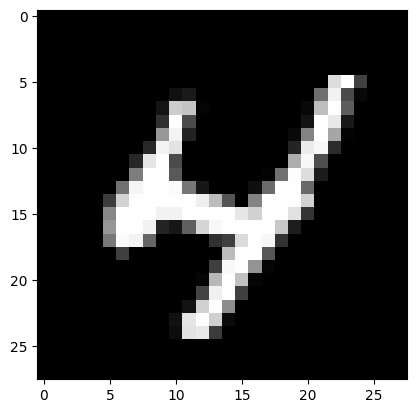

4


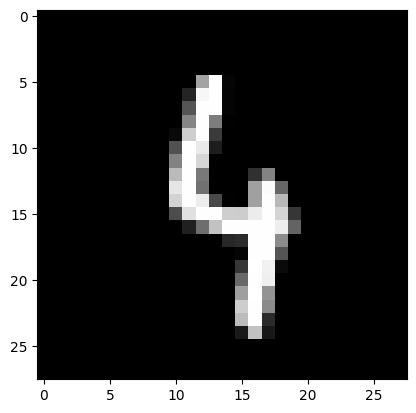

4


Exception ignored in: <function _xla_gc_callback at 0x7d7da4828ae0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


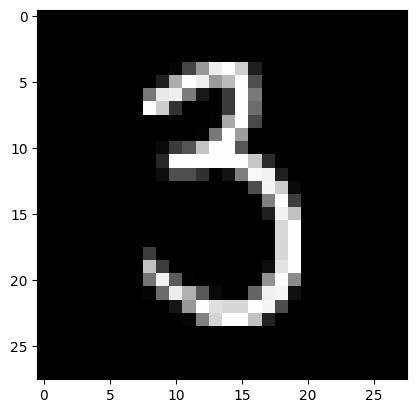

3


In [55]:
# вывод изображения
for i in range(4):
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
  plt.show()
  # вывод метки для этого изображения
  print(y_train[i])

5) Провести предобработку данных: привести обучающие и тестовые данные
к формату, пригодному для обучения нейронной сети. Входные данные
должны принимать значения от 0 до 1, метки цифр должны быть
закодированы по принципу «one-hot encoding». Вывести размерности
предобработанных обучающих и тестовых массивов данных.

In [56]:
# развернем каждое изображение 28*28 в вектор 784
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels) / 255
X_test = X_test.reshape(X_test.shape[0], num_pixels) / 255
print('Shape of transformed X train:', X_train.shape)

Shape of transformed X train: (60000, 784)


In [57]:
# переведем метки в one-hot
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('Shape of transformed y train:', y_train.shape)
num_classes = y_train.shape[1]

Shape of transformed y train: (60000, 10)


6) Реализовать модель однослойной нейронной сети и обучить ее на
обучающих данных с выделением части обучающих данных в качестве
валидационных. Вывести информацию об архитектуре нейронной сети.
Вывести график функции ошибки на обучающих и валидационных данных
по эпохам.  
При реализации модели нейронной сети задать следующую архитектуру и
параметры обучения:
- количество скрытых слоев: 0
- функция активации выходного слоя: softmax
- функция ошибки: categorical_crossentropy
- алгоритм обучения: sgd
- метрика качества: accuracy
- количество эпох: 50
- доля валидационных данных от обучающих: 0.1

In [58]:
from keras.models import Sequential
from keras.layers import Dense

# создаем модель
model_1output = Sequential()
model_1output.add(Dense(units=num_classes, input_dim=num_pixels, activation='softmax'))
# компилируем модель
model_1output.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# вывод информации об архитектуре модели
print(model_1output.summary())

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Обучаем модель
H_1output = model_1output.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7138 - loss: 1.1461 - val_accuracy: 0.8675 - val_loss: 0.5159
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8734 - loss: 0.4895 - val_accuracy: 0.8863 - val_loss: 0.4293
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8909 - loss: 0.4183 - val_accuracy: 0.8938 - val_loss: 0.3940
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8982 - loss: 0.3807 - val_accuracy: 0.8978 - val_loss: 0.3723
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8992 - loss: 0.3713 - val_accuracy: 0.9035 - val_loss: 0.3573
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9030 - loss: 0.3549 - val_accuracy: 0.9055 - val_loss: 0.3480
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9048 - loss: 0.3416 - val_accuracy: 0.9093 - val_loss: 0.3395
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9064 - loss: 0.3378 - 

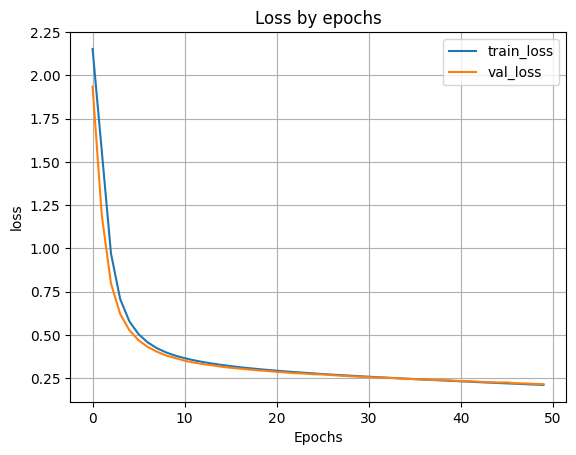

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

7) Применить обученную модель к тестовым данным. Вывести значение
функции ошибки и значение метрики качества классификации на тестовых
данных.

In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model_1output.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9249 - loss: 0.2666
Loss on test data: 0.28093650937080383
Accuracy on test data: 0.921500027179718


8) Добавить в модель один скрытый и провести обучение и тестирование
(повторить п. 6–7) при 100, 300, 500 нейронах в скрытом слое. По метрике
качества классификации на тестовых данных выбрать наилучшее
количество нейронов в скрытом слое. В качестве функции активации
нейронов в скрытом слое использовать функцию sigmoid.

При 100 нейронах в скрытом слое:

In [ ]:
# создаем модель
model_1h100 = Sequential()
model_1h100.add(Dense(units=100, input_dim=num_pixels, activation='sigmoid'))
model_1h100.add(Dense(units=num_classes, activation='softmax'))
# компилируем модель
model_1h100.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# вывод информации об архитектуре модели
print(model_1h100.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Обучаем модель
H_1h100 = model_1h100.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5149 - loss: 1.8602 - val_accuracy: 0.8267 - val_loss: 0.9482
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8325 - loss: 0.8319 - val_accuracy: 0.8600 - val_loss: 0.6231
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8654 - loss: 0.5794 - val_accuracy: 0.8765 - val_loss: 0.5055
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8787 - loss: 0.4856 - val_accuracy: 0.8842 - val_loss: 0.4450
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8888 - loss: 0.4301 - val_accuracy: 0.8907 - val_loss: 0.4096
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8915 - loss: 0.4000 - val_accuracy: 0.8937 - val_loss: 0.3849
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8987 - loss: 0.3766 - val_accuracy: 0.8968 - val_loss: 0.3671
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9022 - loss: 0.3517 - 

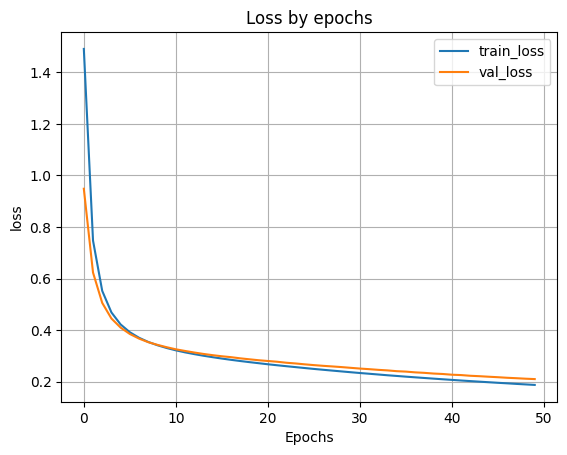

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H_1h100.history['loss'])
plt.plot(H_1h100.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model_1h100.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9391 - loss: 0.2074
Loss on test data: 0.20816442370414734
Accuracy on test data: 0.9397000074386597


При 300 нейронах в скрытом слое:

In [ ]:
# создаем модель
model_1h300 = Sequential()
model_1h300.add(Dense(units=300, input_dim=num_pixels, activation='sigmoid'))
model_1h300.add(Dense(units=num_classes, activation='softmax'))
# компилируем модель
model_1h300.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# вывод информации об архитектуре модели
print(model_1h300.summary())

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,510 (931.68 KB)

 Trainable params: 238,510 (931.68 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Обучаем модель
H_1h300 = model_1h300.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5719 - loss: 1.7778 - val_accuracy: 0.8398 - val_loss: 0.8435
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8458 - loss: 0.7413 - val_accuracy: 0.8675 - val_loss: 0.5641
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8702 - loss: 0.5336 - val_accuracy: 0.8813 - val_loss: 0.4686
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8821 - loss: 0.4528 - val_accuracy: 0.8865 - val_loss: 0.4223
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8915 - loss: 0.4082 - val_accuracy: 0.8918 - val_loss: 0.3919
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8966 - loss: 0.3781 - val_accuracy: 0.8945 - val_loss: 0.3737
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8949 - loss: 0.3723 - val_accuracy: 0.8978 - val_loss: 0.3588
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8985 - loss: 0.3565 

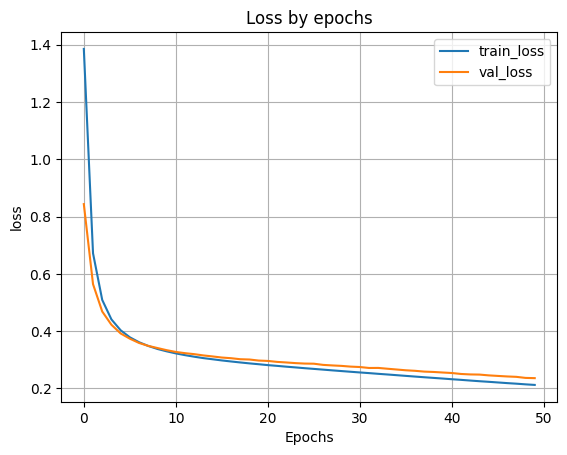

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H_1h300.history['loss'])
plt.plot(H_1h300.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model_1h300.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9327 - loss: 0.2343
Loss on test data: 0.2359277904033661
Accuracy on test data: 0.9320999979972839


При 500 нейронах в скрытом слое:

In [ ]:
# создаем модель
model_1h500 = Sequential()
model_1h500.add(Dense(units=500, input_dim=num_pixels, activation='sigmoid'))
model_1h500.add(Dense(units=num_classes, activation='softmax'))
# компилируем модель
model_1h500.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# вывод информации об архитектуре модели
print(model_1h500.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 397,510 (1.52 MB)

 Trainable params: 397,510 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Обучаем модель
H_1h500 = model_1h500.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5713 - loss: 1.7416 - val_accuracy: 0.8273 - val_loss: 0.8147
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8444 - loss: 0.7193 - val_accuracy: 0.8675 - val_loss: 0.5526
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8684 - loss: 0.5240 - val_accuracy: 0.8808 - val_loss: 0.4634
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8806 - loss: 0.4544 - val_accuracy: 0.8858 - val_loss: 0.4189
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8899 - loss: 0.4051 - val_accuracy: 0.8908 - val_loss: 0.3922
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8969 - loss: 0.3771 - val_accuracy: 0.8917 - val_loss: 0.3733
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8982 - loss: 0.3646 - val_accuracy: 0.8952 - val_loss: 0.3598
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9015 - loss: 0.3508 -

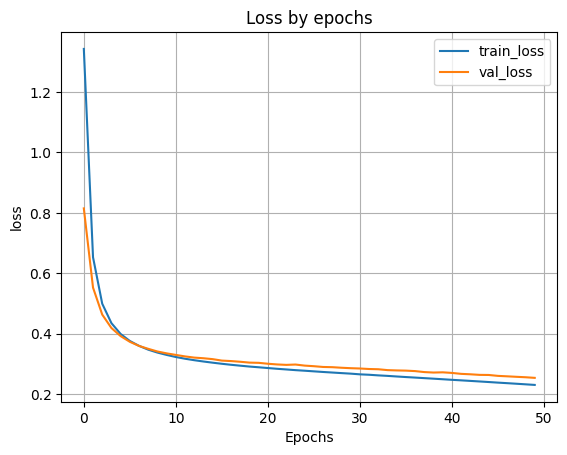

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H_1h500.history['loss'])
plt.plot(H_1h500.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model_1h500.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9282 - loss: 0.2529
Loss on test data: 0.25467056035995483
Accuracy on test data: 0.9280999898910522


Лучшая метрика получилась равной 0.943 при архитектуре со 100 нейронами в скрытом слое, поэтому в дальнейшем используем ее.

9) Добавить в наилучшую архитектуру, определенную в п. 8, второй скрытый
слой и провести обучение и тестирование (повторить п. 6–7) при 50 и 100
нейронах во втором скрытом слое. В качестве функции активации
нейронов в скрытом слое использовать функцию sigmoid.

При 50 нейронах во втором скрытом слое:

In [59]:
# создаем модель
model_1h100_2h50 = Sequential()
model_1h100_2h50.add(Dense(units=100, input_dim=num_pixels, activation='sigmoid'))
model_1h100_2h50.add(Dense(units=50, activation='sigmoid'))
model_1h100_2h50.add(Dense(units=num_classes, activation='softmax'))
# компилируем модель
model_1h100_2h50.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# вывод информации об архитектуре модели
print(model_1h100_2h50.summary())

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,060 (328.36 KB)

 Trainable params: 84,060 (328.36 KB)

 Non-trainable params: 0 (0.00 B)

None


In [60]:
# Обучаем модель
H_1h100_2h50 = model_1h100_2h50.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2225 - loss: 2.2643 - val_accuracy: 0.4647 - val_loss: 2.0889
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5393 - loss: 1.9751 - val_accuracy: 0.6795 - val_loss: 1.5483
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6897 - loss: 1.4097 - val_accuracy: 0.7602 - val_loss: 1.0517
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7794 - loss: 0.9745 - val_accuracy: 0.8165 - val_loss: 0.7786
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8277 - loss: 0.7410 - val_accuracy: 0.8482 - val_loss: 0.6324
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8513 - loss: 0.6139 - val_accuracy: 0.8635 - val_loss: 0.5454
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8651 - loss: 0.5384 - val_accuracy: 0.8730 - val_loss: 0.4874
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8759 - loss: 0.4813 -

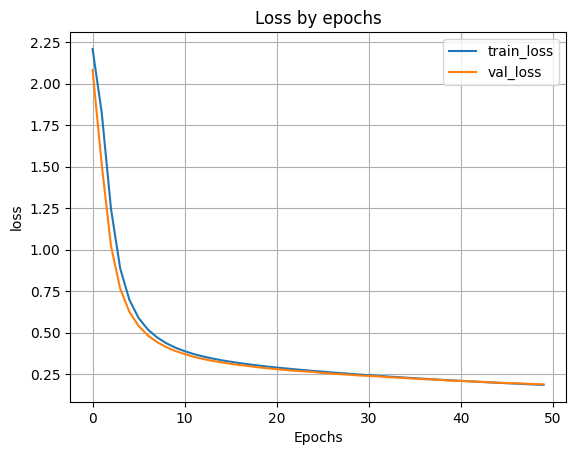

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H_1h100_2h50.history['loss'])
plt.plot(H_1h100_2h50.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model_1h100_2h50.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9454 - loss: 0.1818
Loss on test data: 0.19274231791496277
Accuracy on test data: 0.9430000185966492


При 100 нейронах во втором скрытом слое:

In [ ]:
# создаем модель
model_1h100_2h100 = Sequential()
model_1h100_2h100.add(Dense(units=100, input_dim=num_pixels, activation='sigmoid'))
model_1h100_2h100.add(Dense(units=100, activation='sigmoid'))
model_1h100_2h100.add(Dense(units=num_classes, activation='softmax'))
# компилируем модель
model_1h100_2h100.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# вывод информации об архитектуре модели
print(model_1h100_2h100.summary())

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Обучаем модель
H_1h100_2h100 = model_1h100_2h100.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2265 - loss: 2.2685 - val_accuracy: 0.4253 - val_loss: 2.0877
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5373 - loss: 1.9708 - val_accuracy: 0.6772 - val_loss: 1.5106
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6911 - loss: 1.3719 - val_accuracy: 0.7632 - val_loss: 1.0021
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7798 - loss: 0.9299 - val_accuracy: 0.8145 - val_loss: 0.7389
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8257 - loss: 0.7067 - val_accuracy: 0.8452 - val_loss: 0.5985
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8513 - loss: 0.5799 - val_accuracy: 0.8655 - val_loss: 0.5154
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8667 - loss: 0.5053 - val_accuracy: 0.8765 - val_loss: 0.4650
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8731 - loss: 0.4697 

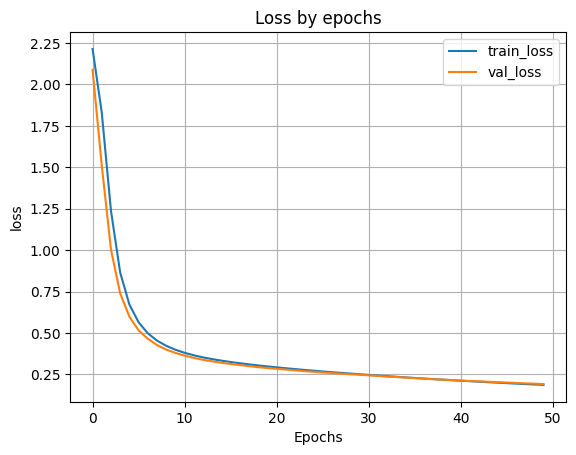

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H_1h100_2h100.history['loss'])
plt.plot(H_1h100_2h100.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model_1h100_2h100.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9362 - loss: 0.2106
Loss on test data: 0.21183738112449646
Accuracy on test data: 0.9372000098228455


10) Результаты исследования архитектуры нейронной сети занести в
таблицу:
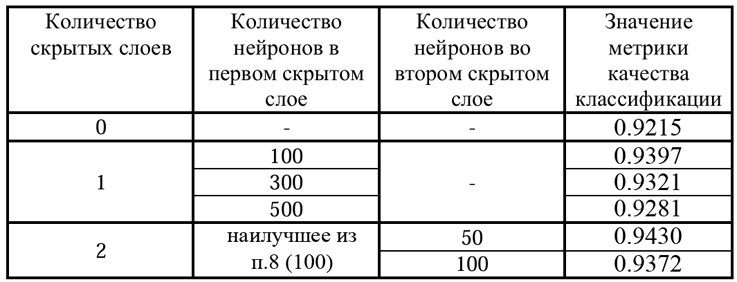

По результатам исследования сделать выводы и выбрать наилучшую
архитектуру нейронной сети с точки зрения качества классификации.

Из таблицы следует, что лучшей архитектурой является НС с двумя скрытыми слоями по 100 и 50 нейронов соответственно, затем идет НС с одним скрытым слоем и 100 нейронами. При увеличении количества нейронов в скрытык слоях значение метрики качества падает. Такая тенденция возникает из-за простоты датасета MNIST, при усложнении архитектуры НС начинает переобучаться, а оценка качетсва на тестовых данных падать.

11) Сохранить наилучшую нейронную сеть на диск. Данную нейронную
сеть потребуется загрузить с диска в одной из следующих лабораторных
работ.

In [62]:
# сохранение модели на диск
model_1h100_2h50.save('/content/drive/MyDrive/Colab Notebooks/laba1/model_1h100_2h50.keras')

12) Для нейронной сети наилучшей архитектуры вывести два тестовых
изображения, истинные метки и результат распознавания изображений.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
NN output: [[2.9130476e-02 5.3324870e-06 9.6752131e-01 2.5341648e-03 1.2145542e-06
  2.5728915e-04 1.0855521e-04 1.8212755e-04 2.3601220e-04 2.3541097e-05]]


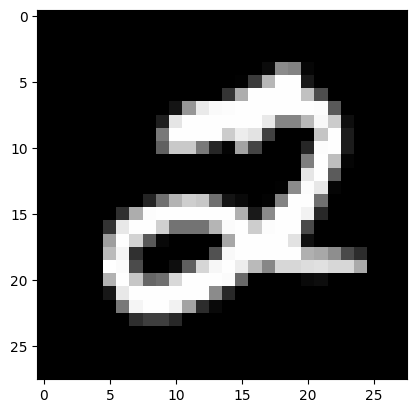

Real mark:  2
NN answer:  2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
NN output: [[5.2140213e-06 4.1654346e-07 3.1492444e-05 1.7709195e-05 2.7664129e-03
  2.7269698e-05 2.1200174e-06 8.0334948e-04 1.6337440e-03 9.9471223e-01]]


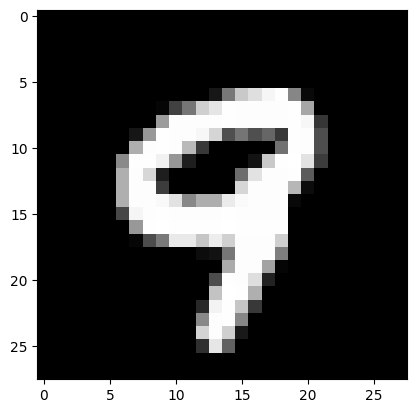

Real mark:  9
NN answer:  9


In [92]:
#Результаты для двух тестовых изображений
for n in [3,26]:
  result = model_1h100_2h50.predict(X_test[n:n+1])
  print('NN output:', result)

  plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
  plt.show()
  print('Real mark: ', str(np.argmax(y_test[n])))
  print('NN answer: ', str(np.argmax(result)))


13) Каждому члену бригады создать собственное изображение рукописной
цифры, подобное представленным в наборе MNIST. Цифру выбрать как
остаток от деления на 10 числа своего дня рождения (26 ноября
→ 26 mod 10 = 6, 3 июля → 3 mod 10 = 3). Сохранить изображения. Загрузить, предобработать и
подать на вход обученной нейронной сети собственные изображения.
Вывести изображения и результаты распознавания.

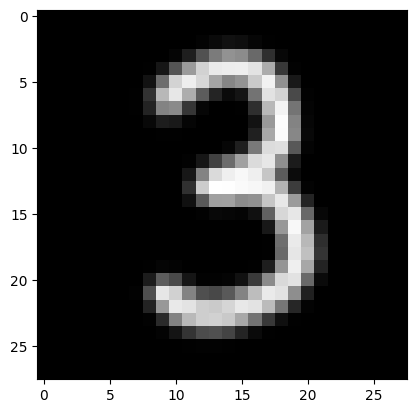

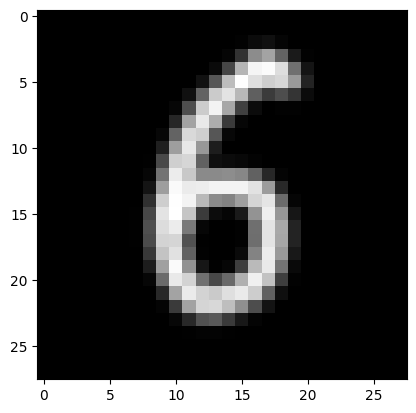

In [100]:
# загрузка собственного изображения
from PIL import Image
file1_data = Image.open('/content/drive/MyDrive/Colab Notebooks/laba1/цифра 3.png')
file1_data = file1_data.convert('L') # перевод в градации серого
test1_img = np.array(file1_data)
plt.imshow(test1_img, cmap=plt.get_cmap('gray'))
plt.show()

from PIL import Image
file2_data = Image.open('/content/drive/MyDrive/Colab Notebooks/laba1/цифра 6.png')
file2_data = file2_data.convert('L') # перевод в градации серого
test2_img = np.array(file2_data)

# вывод собственного изображения
plt.imshow(test1_img, cmap=plt.get_cmap('gray'))
plt.imshow(test2_img, cmap=plt.get_cmap('gray'))
plt.show()

In [101]:
# предобработка
test1_img = test1_img / 255
test1_img = test1_img.reshape(1, num_pixels)
test2_img = test2_img / 255
test2_img = test2_img.reshape(1, num_pixels)

# распознавание
result1 = model_1h100_2h50.predict(test1_img)
print('Я думаю это ', np.argmax(result1))

result2 = model_1h100_2h50.predict(test2_img)
print('Я думаю это ', np.argmax(result2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Я думаю это  3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Я думаю это  6


14) Каждому члену бригады создать копию собственного изображения,
отличающуюся от оригинала поворотом на 90 градусов в любую сторону.
Сохранить изображения. Загрузить, предобработать и подать на вход
обученной нейронной сети измененные изображения. Вывести
изображения и результаты распознавания. Сделать выводы по результатам
эксперимента.

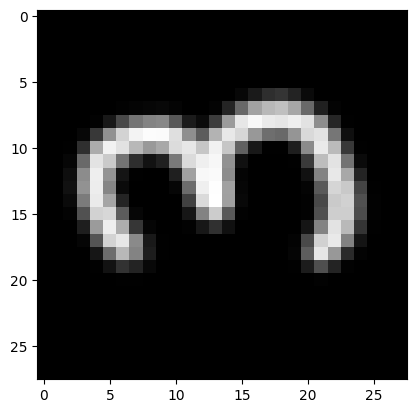

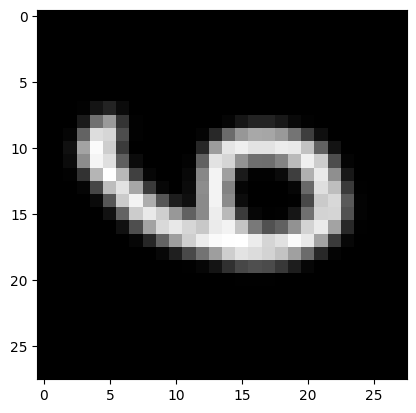

In [102]:
# загрузка собственного изображения
from PIL import Image
file3_data = Image.open('/content/drive/MyDrive/Colab Notebooks/laba1/цифра 3 перевернутая.png')
file3_data = file3_data.convert('L') # перевод в градации серого
test3_img = np.array(file3_data)
plt.imshow(test3_img, cmap=plt.get_cmap('gray'))
plt.show()

from PIL import Image
file4_data = Image.open('/content/drive/MyDrive/Colab Notebooks/laba1/цифра 6 перевернутая.png')
file4_data = file4_data.convert('L') # перевод в градации серого
test4_img = np.array(file4_data)

# вывод собственного изображения
plt.imshow(test3_img, cmap=plt.get_cmap('gray'))
plt.imshow(test4_img, cmap=plt.get_cmap('gray'))
plt.show()

In [103]:
# предобработка
test3_img = test3_img / 255
test3_img = test3_img.reshape(1, num_pixels)
test4_img = test4_img / 255
test4_img = test4_img.reshape(1, num_pixels)

# распознавание
result3 = model_1h100_2h50.predict(test3_img)
print('Я думаю это ', np.argmax(result3))

result4 = model_1h100_2h50.predict(test4_img)
print('Я думаю это ', np.argmax(result4))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Я думаю это  5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Я думаю это  4


При повороте рисунков цифр НС не смогла их правильно распознать. Так получилось получилось потому что НС не обучалась на перевернутых изображений.